#### Customs Data Analysis and CBAM prediction

In this notebook I will analyse customs data of an imaginary company using synthetic data generated by ChatGPT. 
After that, I will build models and test them to select the most appropriate model to use for the prediction given a set of features

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import pickle
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at te

In [ ]:
#data source path
data = r'import_cbam_dataset.csv'

In [3]:
# loading data to dataframe

df = pd.read_csv(data)

In [4]:
#data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Import_ID            10000 non-null  int64  
 1   HS_Code              10000 non-null  float64
 2   Product_Description  10000 non-null  object 
 3   Country_of_Origin    10000 non-null  object 
 4   Quantity_tonnes      10000 non-null  float64
 5   Value_EUR            10000 non-null  float64
 6   CO2_Embedded_tCO2    10000 non-null  float64
 7   Transport_Mode       10000 non-null  object 
 8   Customs_Regime       10000 non-null  object 
 9   Sector               10000 non-null  object 
 10  CBAM_Subject         10000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 859.5+ KB


In [5]:
# stat description

df.describe()

,Import_ID,HS_Code,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2
count,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,5000.50000,4885.743430,1008.14827,4.409288e+05,14.037465
std,2886.89568,2645.452113,571.48991,3.279497e+05,15.282176
min,1.00000,402.210000,10.10000,1.451810e+03,0.010000
25%,2500.75000,2716.000000,514.85250,1.770587e+05,3.450000
50%,5000.50000,3102.600000,1010.79500,3.676245e+05,8.315000
75%,7500.25000,7601.200000,1504.37250,6.451827e+05,18.452500
max,10000.00000,8517.120000,1999.85000,1.595181e+06,78.360000


In [6]:
#first 20 rows

df.head(20)

,Import_ID,HS_Code,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject
0,1,3102.60,Fertiliser product (3102.60),Turkey,755.33,580066.47,23.13,Sea,Transit,Fertiliser,Yes
1,2,3102.10,Fertiliser product (3102.10),Turkey,1201.33,302028.92,12.57,Air,Inward processing,Fertiliser,Yes
2,3,3102.60,Fertiliser product (3102.60),Turkey,125.59,89547.49,3.27,Rail,Transit,Fertiliser,Yes
3,4,2716.00,Electricity product (2716.00),Saudi Arabia,1419.06,231845.91,55.27,Sea,Temporary admission,Electricity,Yes
4,5,2716.00,Electricity product (2716.00),Saudi Arabia,1666.56,480003.31,18.94,Sea,Free circulation,Electricity,Yes
5,6,3102.30,Fertiliser product (3102.30),South Africa,374.97,130398.61,8.76,Air,Inward processing,Fertiliser,Yes
6,7,3102.10,Fertiliser product (3102.10),India,869.57,295044.18,22.97,Road,Inward processing,Fertiliser,Yes
7,8,2523.21,Cement product (2523.21),China,287.59,97750.12,5.13,Rail,Inward processing,Cement,Yes
8,9,7214.91,Steel product (7214.91),Egypt,917.58,605937.14,11.00,Sea,Inward processing,Steel,Yes
9,10,2804.10,Hydrogen product (2804.10),Saudi Arabia,1033.33,552903.34,6.85,Air,Free circulation,Hydrogen,Yes


Exploratory Data Analysis

In [7]:
#total value of imports

total_value = df["Value_EUR"].sum()

print(f"total value of import: {total_value} Euros")



total value of import: 4409288226.82 Euros


In [8]:
#total tonnes of imports

total_tonnes = df["Quantity_tonnes"].sum()

print(f"total value of import: {total_tonnes} tonnes")

total value of import: 10081482.7 tonnes


In [9]:
total_value_per_export_country = df.groupby("Country_of_Origin")["Value_EUR"].sum().sort_values(ascending=False)
total_value_per_export_country

Country_of_Origin
Turkey          4.638218e+08
Ukraine         4.588161e+08
USA             4.534300e+08
South Africa    4.486770e+08
Egypt           4.456165e+08
Brazil          4.347699e+08
China           4.296262e+08
Russia          4.284189e+08
Saudi Arabia    4.233676e+08
India           4.227442e+08
Name: Value_EUR, dtype: float64

In [10]:
total_tonnes_per_export_country = df.groupby("Country_of_Origin")["Quantity_tonnes"].sum().sort_values(ascending=False)
total_tonnes_per_export_country

Country_of_Origin
Turkey          1060266.55
USA             1047958.73
Ukraine         1036158.08
South Africa    1018345.11
Egypt           1000338.23
Brazil           998083.94
India            988303.57
Saudi Arabia     984305.15
China            982827.28
Russia           964896.06
Name: Quantity_tonnes, dtype: float64

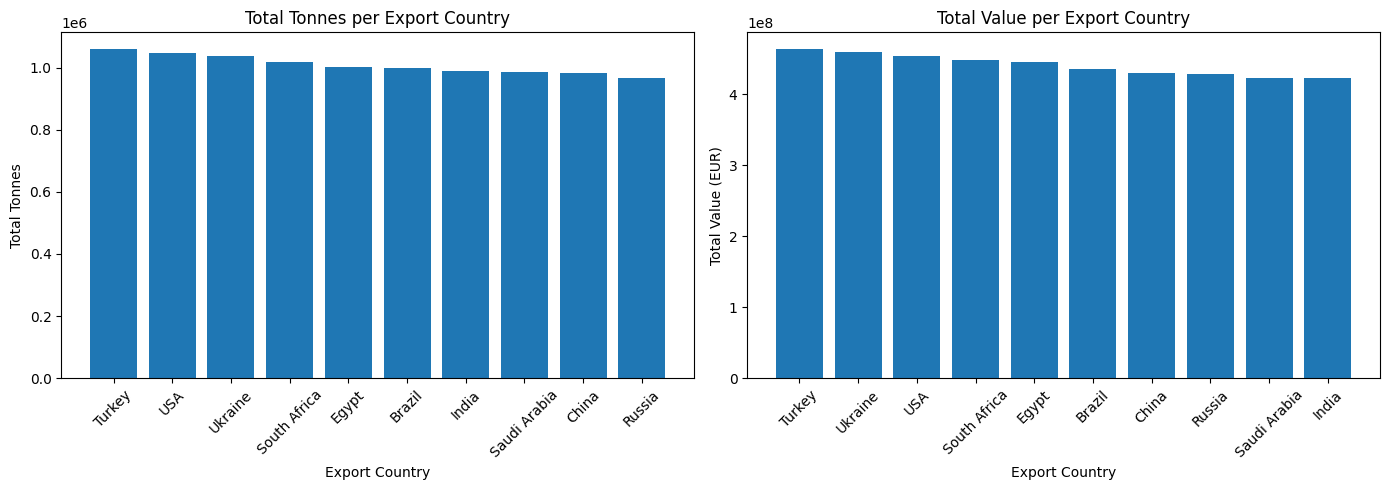

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Plot total tonnes
ax1.bar(total_tonnes_per_export_country.index.astype(str),
        total_tonnes_per_export_country.values)
ax1.set_title("Total Tonnes per Export Country")
ax1.set_xlabel("Export Country")
ax1.set_ylabel("Total Tonnes")
ax1.tick_params(axis='x', rotation=45)

# Plot total value
ax2.bar(total_value_per_export_country.index.astype(str),
        total_value_per_export_country.values)
ax2.set_title("Total Value per Export Country")
ax2.set_xlabel("Export Country")
ax2.set_ylabel("Total Value (EUR)")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

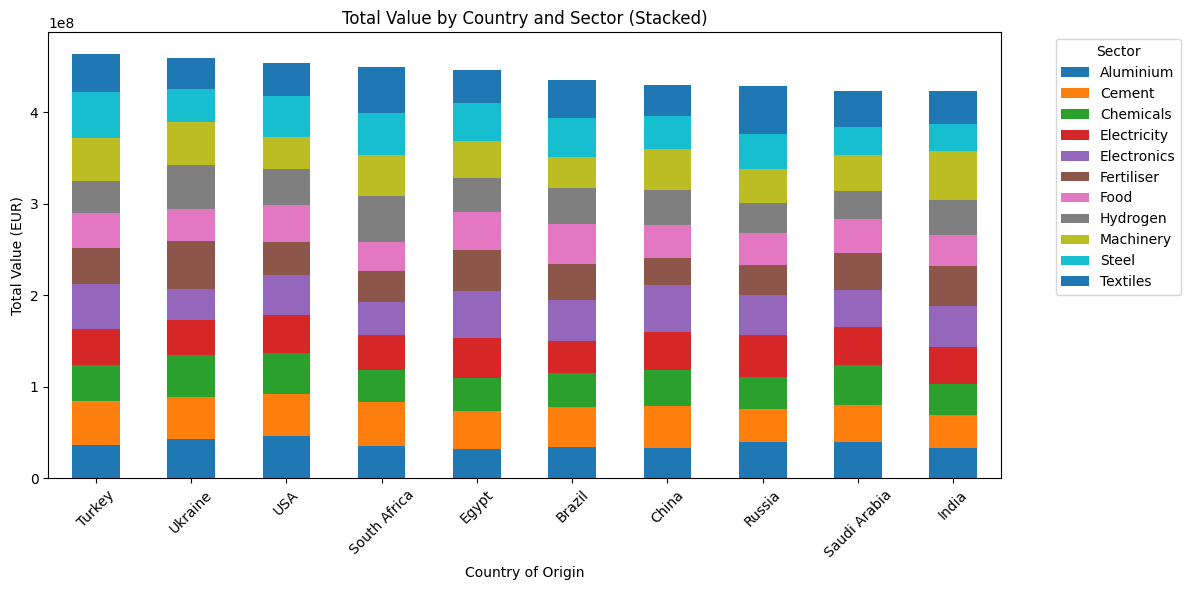

In [12]:
import matplotlib.pyplot as plt

#Pivot to get sectors as columns, countries as index
pivot_df = df.groupby(["Country_of_Origin", "Sector"])["Value_EUR"].sum().unstack(fill_value=0)

#Sort countries by total value (row sum)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

#Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_ylabel("Total Value (EUR)")
ax.set_xlabel("Country of Origin")
ax.set_title("Total Value by Country and Sector (Stacked)")

plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


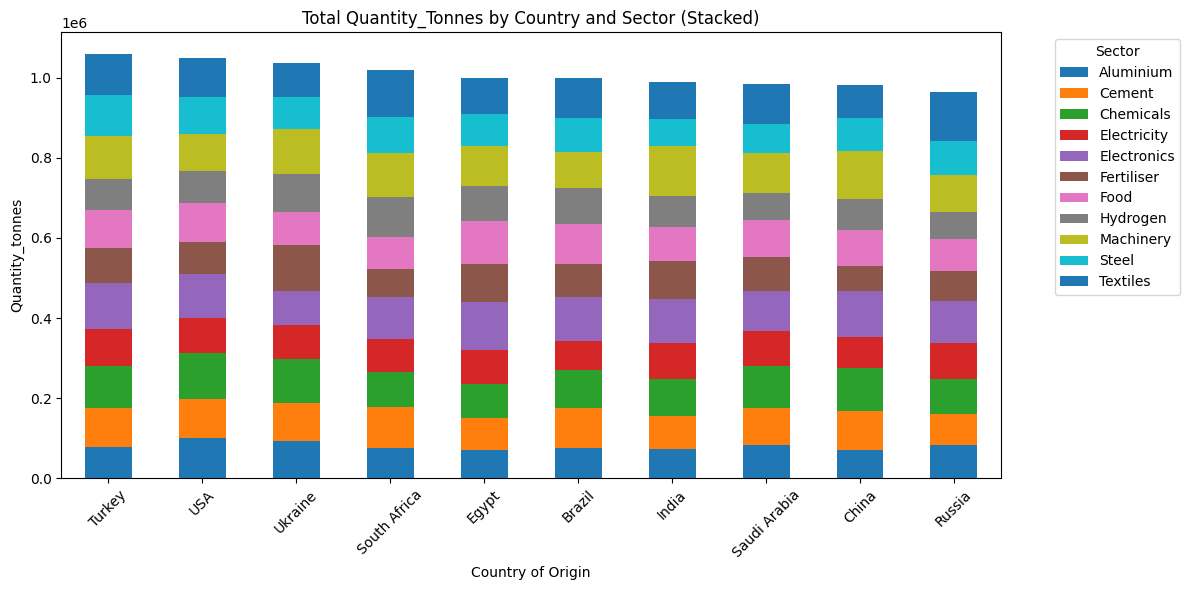

In [13]:
import matplotlib.pyplot as plt

#Pivot to get sectors as columns, countries as index
pivot_df = df.groupby(["Country_of_Origin", "Sector"])["Quantity_tonnes"].sum().unstack(fill_value=0)

#Sort countries by total value (row sum)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

#Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_ylabel("Quantity_tonnes")
ax.set_xlabel("Country of Origin")
ax.set_title("Total Quantity_Tonnes by Country and Sector (Stacked)")

plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
total_CBAM_quantity = df.loc[df["CBAM_Subject"]== "Yes"]["Quantity_tonnes"].sum()
print(f"total CBAM Imports Quantity in tonnes: {total_CBAM_quantity} tonnes")

total CBAM Imports Quantity in tonnes: 5067154.0 tonnes


In [15]:
total_CBAM_value = df.loc[df["CBAM_Subject"]== "Yes"]["Value_EUR"].sum()
total_CBAM_value = round(total_CBAM_value,2)
print(f"total CBAM Imports Value in Euro: {total_CBAM_value} EUR")

total CBAM Imports Value in Euro: 2390561078.23 EUR


In [16]:
#creating a dataframe for only CBAM related imports
cbam_data = df.loc[df['CBAM_Subject'] == "Yes"]
cbam_data

,Import_ID,HS_Code,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject
0,1,3102.6,Fertiliser product (3102.60),Turkey,755.33,580066.47,23.13,Sea,Transit,Fertiliser,Yes
1,2,3102.1,Fertiliser product (3102.10),Turkey,1201.33,302028.92,12.57,Air,Inward processing,Fertiliser,Yes
2,3,3102.6,Fertiliser product (3102.60),Turkey,125.59,89547.49,3.27,Rail,Transit,Fertiliser,Yes
3,4,2716.0,Electricity product (2716.00),Saudi Arabia,1419.06,231845.91,55.27,Sea,Temporary admission,Electricity,Yes
4,5,2716.0,Electricity product (2716.00),Saudi Arabia,1666.56,480003.31,18.94,Sea,Free circulation,Electricity,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2716.0,Electricity product (2716.00),Russia,910.92,606375.89,29.07,Rail,Temporary admission,Electricity,Yes
4996,4997,2716.0,Electricity product (2716.00),Egypt,1338.83,944686.38,50.71,Sea,Inward processing,Electricity,Yes
4997,4998,3102.1,Fertiliser product (3102.10),Ukraine,1164.17,354320.72,22.06,Air,Temporary admission,Fertiliser,Yes
4998,4999,2523.9,Cement product (2523.90),Ukraine,1519.03,870517.00,17.05,Rail,Inward processing,Cement,Yes


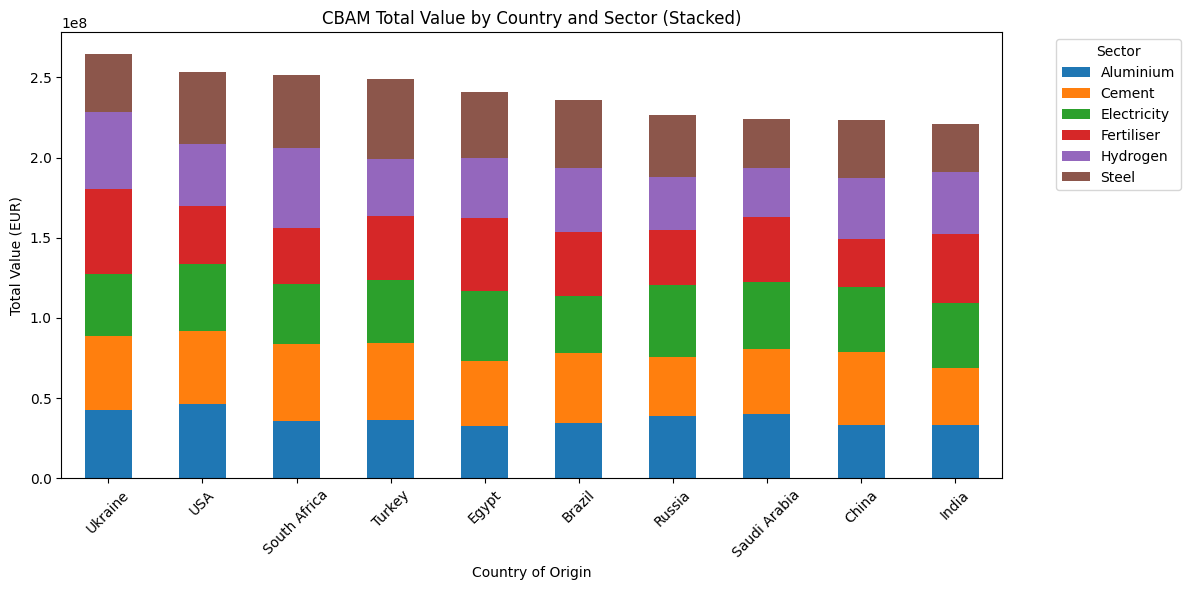

In [17]:
#Pivot to get sectors as columns, countries as index
cbam_pivot_df = cbam_data.groupby(["Country_of_Origin", "Sector"])["Value_EUR"].sum().unstack(fill_value=0)

#Sort countries by total value (row sum)
cbam_pivot_df = cbam_pivot_df.loc[cbam_pivot_df.sum(axis=1).sort_values(ascending=False).index]

#Plot
ax = cbam_pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_ylabel("Total Value (EUR)")
ax.set_xlabel("Country of Origin")
ax.set_title("CBAM Total Value by Country and Sector (Stacked)")

plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

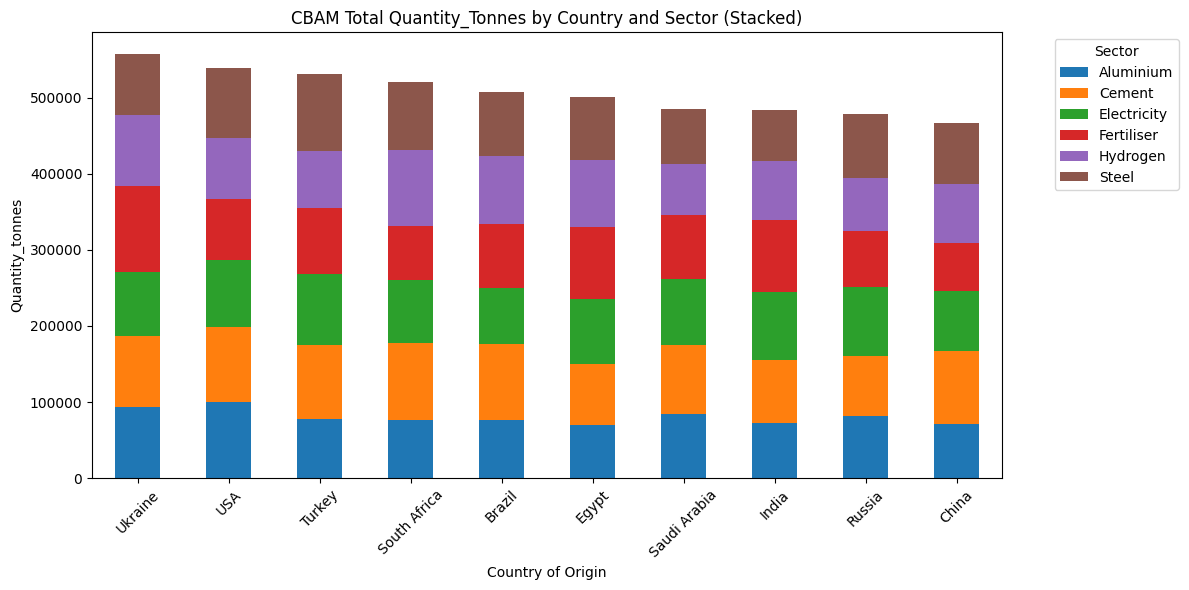

In [18]:
#Pivot to get sectors as columns, countries as index
cbam_pivot_df = cbam_data.groupby(["Country_of_Origin", "Sector"])["Quantity_tonnes"].sum().unstack(fill_value=0)

#Sort countries by total value (row sum)
cbam_pivot_df = cbam_pivot_df.loc[cbam_pivot_df.sum(axis=1).sort_values(ascending=False).index]

#Plot
ax = cbam_pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

ax.set_ylabel("Quantity_tonnes")
ax.set_xlabel("Country of Origin")
ax.set_title("CBAM Total Quantity_Tonnes by Country and Sector (Stacked)")

plt.xticks(rotation=45)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
#total CO2

total_CO2 = df["CO2_Embedded_tCO2"].sum()

print(f"total CO2 from imports: {total_CO2}")



total CO2 from imports: 140374.65


In [20]:
total_cbam_co2 = df.loc[df["CBAM_Subject"]== "Yes"]['CO2_Embedded_tCO2'].sum()
total_non_cbam_co2 = df.loc[df["CBAM_Subject"]== "No"]['CO2_Embedded_tCO2'].sum()


print(f"total CBAM related CO2: {total_cbam_co2} metric tonnes of CO₂ (t CO₂)")
print(f"total NON-CBAM related CO2: {total_non_cbam_co2} metric tonnes of CO₂ (t CO₂)")

total CBAM related CO2: 112580.5 metric tonnes of CO₂ (t CO₂)
total NON-CBAM related CO2: 27794.15 metric tonnes of CO₂ (t CO₂)


In [21]:
df.loc[df['CBAM_Subject'] == 'No']

,Import_ID,HS_Code,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject
5000,5001,3901.10,Chemicals product (3901.10),Egypt,1004.34,550426.59,6.09,Sea,Free circulation,Chemicals,No
5001,5002,8501.10,Electronics product (8501.10),Turkey,175.77,37148.66,0.52,Road,Transit,Electronics,No
5002,5003,8501.10,Electronics product (8501.10),USA,523.15,229789.47,2.90,Sea,Transit,Electronics,No
5003,5004,2905.11,Chemicals product (2905.11),Brazil,414.29,58221.38,1.05,Sea,Transit,Chemicals,No
5004,5005,402.21,Food product (0402.21),Saudi Arabia,1968.92,750410.88,17.34,Rail,Transit,Food,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,5208.39,Textiles product (5208.39),India,1219.34,581850.02,2.21,Rail,Temporary admission,Textiles,No
9996,9997,2905.11,Chemicals product (2905.11),Russia,936.95,240234.95,4.88,Sea,Inward processing,Chemicals,No
9997,9998,8429.52,Machinery product (8429.52),Brazil,1556.37,303423.26,3.28,Road,Temporary admission,Machinery,No
9998,9999,1006.30,Food product (1006.30),China,545.94,366525.16,4.22,Sea,Inward processing,Food,No


In [22]:
df.loc[df['Country_of_Origin'] == "Egypt"]

,Import_ID,HS_Code,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject
8,9,7214.91,Steel product (7214.91),Egypt,917.58,605937.14,11.00,Sea,Inward processing,Steel,Yes
11,12,7214.91,Steel product (7214.91),Egypt,1898.28,1476217.98,63.20,Road,Free circulation,Steel,Yes
26,27,2523.90,Cement product (2523.90),Egypt,723.35,162981.52,25.47,Road,Transit,Cement,Yes
29,30,2716.00,Electricity product (2716.00),Egypt,1278.74,929245.37,27.53,Air,Free circulation,Electricity,Yes
48,49,3102.10,Fertiliser product (3102.10),Egypt,576.83,100354.87,15.19,Air,Inward processing,Fertiliser,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9940,9941,8471.30,Electronics product (8471.30),Egypt,1753.86,889746.23,6.17,Air,Free circulation,Electronics,No
9956,9957,402.21,Food product (0402.21),Egypt,519.26,84445.26,3.82,Rail,Inward processing,Food,No
9958,9959,6109.10,Textiles product (6109.10),Egypt,1113.44,764462.81,8.99,Rail,Inward processing,Textiles,No
9966,9967,1701.99,Food product (1701.99),Egypt,1202.91,771258.56,7.46,Road,Temporary admission,Food,No


### Creating a general HS Code column
#### I am doing it because the numbers after the decimal point apply to a subset of a general classification. I only want the general classification

In [23]:
#checking how many unique HS Codes there are

df["HS_Code"].nunique()

29

In [24]:
# creating a function that takes all the values of the HS_Code column before the decimal point
def hscode(value):
   value = str(value) # convert the value to a string
   point = value.find(".") #find the location of "."
   if point != -1: #if 
      return value[:point] 
   return value

In [25]:
#creating a general hs_code column
df["hscode_general"] = df["HS_Code"].apply(hscode)

In [26]:
df["hscode_general"].nunique()

24

In [27]:
#checking if the code worked accurately
df.head()

,Import_ID,HS_Code,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject,hscode_general
0,1,3102.6,Fertiliser product (3102.60),Turkey,755.33,580066.47,23.13,Sea,Transit,Fertiliser,Yes,3102
1,2,3102.1,Fertiliser product (3102.10),Turkey,1201.33,302028.92,12.57,Air,Inward processing,Fertiliser,Yes,3102
2,3,3102.6,Fertiliser product (3102.60),Turkey,125.59,89547.49,3.27,Rail,Transit,Fertiliser,Yes,3102
3,4,2716.0,Electricity product (2716.00),Saudi Arabia,1419.06,231845.91,55.27,Sea,Temporary admission,Electricity,Yes,2716
4,5,2716.0,Electricity product (2716.00),Saudi Arabia,1666.56,480003.31,18.94,Sea,Free circulation,Electricity,Yes,2716


In [28]:
# dropping the HS_Code column

df.drop("HS_Code", axis=1, inplace=True)
df.head()

,Import_ID,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject,hscode_general
0,1,Fertiliser product (3102.60),Turkey,755.33,580066.47,23.13,Sea,Transit,Fertiliser,Yes,3102
1,2,Fertiliser product (3102.10),Turkey,1201.33,302028.92,12.57,Air,Inward processing,Fertiliser,Yes,3102
2,3,Fertiliser product (3102.60),Turkey,125.59,89547.49,3.27,Rail,Transit,Fertiliser,Yes,3102
3,4,Electricity product (2716.00),Saudi Arabia,1419.06,231845.91,55.27,Sea,Temporary admission,Electricity,Yes,2716
4,5,Electricity product (2716.00),Saudi Arabia,1666.56,480003.31,18.94,Sea,Free circulation,Electricity,Yes,2716


## Building a Neural Network Model
#### Looking at the data and applying business knowledge, there are columns that possibly determine if an import is subject to CBAM rules.
#### These include the sector, country of origin, customs regime, hscode and perhaps Transport Mode. 
#### I will build the model by:
#### 1. doing some feature engineering including label encoding and one-hot encoding
#### 2.  I will split the data to into training and testing sets, 
#### 3. buid a neural network using three layers 
#### 4. test the model
#### 5. build a function that checks if an import is subject the CBAM and calculates the total CBAM levy based on its characteristics



#### 1. Label Encoding CBAM_subject and HS_Code column 
selected_columns = ['Country_of_Origin',
                    'Transport_Mode',
                    'Customs_Regime',
                    'Sector']

In [29]:
encoder = LabelEncoder()

In [30]:
selected_columns = ['CBAM_Subject',
                    'hscode_general',
                    'Country_of_Origin',
                    'Transport_Mode',
                    'Customs_Regime',
                    'Sector']

encoders = {}  # store one encoder per column

for column in selected_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le  # save this encoder

# Save all encoders at once
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [31]:
df.head()

,Import_ID,Product_Description,Country_of_Origin,Quantity_tonnes,Value_EUR,CO2_Embedded_tCO2,Transport_Mode,Customs_Regime,Sector,CBAM_Subject,hscode_general
0,1,Fertiliser product (3102.60),7,755.33,580066.47,23.13,3,3,5,1,7
1,2,Fertiliser product (3102.10),7,1201.33,302028.92,12.57,0,1,5,1,7
2,3,Fertiliser product (3102.60),7,125.59,89547.49,3.27,1,3,5,1,7
3,4,Electricity product (2716.00),5,1419.06,231845.91,55.27,3,2,3,1,3
4,5,Electricity product (2716.00),5,1666.56,480003.31,18.94,3,0,3,1,3


In [32]:
# columns to be dropped since they dont serve the purpose of this model. 
columns_not_needed = ["Import_ID", "Product_Description", "Quantity_tonnes", "Value_EUR", "CO2_Embedded_tCO2"]

In [33]:
#creating a new dataframe with unecessary columns dropped
df1 = df.drop(columns_not_needed, axis=1)

In [34]:
df1

,Country_of_Origin,Transport_Mode,Customs_Regime,Sector,CBAM_Subject,hscode_general
0,7,3,3,5,1,7
1,7,0,1,5,1,7
2,7,1,3,5,1,7
3,5,3,2,3,1,3
4,5,3,0,3,1,3
...,...,...,...,...,...,...
9995,3,1,2,10,0,10
9996,4,3,1,2,0,5
9997,0,2,2,8,0,20
9998,1,3,1,6,0,0


In [35]:
#creating the feature and target variables. X_data = input features, y_data = target variable
y_data = df1["CBAM_Subject"]
X_data = df1.drop("CBAM_Subject", axis=1)

#### 2. Splitting the data into training and testing data; reserving 30% for testing



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state =1)

In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"X_train shape: {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape: f{y_test.shape}")

X_train shape: (7000, 5)
X_train shape: (3000, 5)
y_train shape (7000,)
y_test shape: f(3000,)


#### Building neural Network

In [38]:
#building  Neural Network model using forward prop 
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])
history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=16, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.5918 - recall: 0.6798 - val_loss: 0.5558 - val_recall: 0.9150
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.4890 - recall: 0.9510 - val_loss: 0.4400 - val_recall: 1.0000
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.3607 - recall: 0.9984 - val_loss: 0.2962 - val_recall: 1.0000
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.2487 - recall: 1.0000 - val_loss: 0.2326 - val_recall: 1.0000
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.2049 - recall: 0.9967 - val_loss: 0.1997 - val_recall: 0.9935
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.1761 - recall: 0.9971 - val_loss: 0.1852 - val_recall: 0.9757
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.1585 - recall: 0.9971 - val_loss: 0.1666 - val_recall: 1.0000
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.1434 - recall: 0.9963 - val_loss: 0.1477 - val_recall:

In [39]:
y_hat_prob = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


In [40]:
y_hat_prob

array([[7.0359270e-06],
       [1.0000000e+00],
       [9.9996495e-01],
       ...,
       [1.0000000e+00],
       [9.9973470e-01],
       [4.6438067e-03]], shape=(3000, 1), dtype=float32)

In [41]:
y_hat = (y_hat_prob >= 0.5).astype(int)

In [42]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [43]:
conf_m = confusion_matrix(y_test,y_hat)

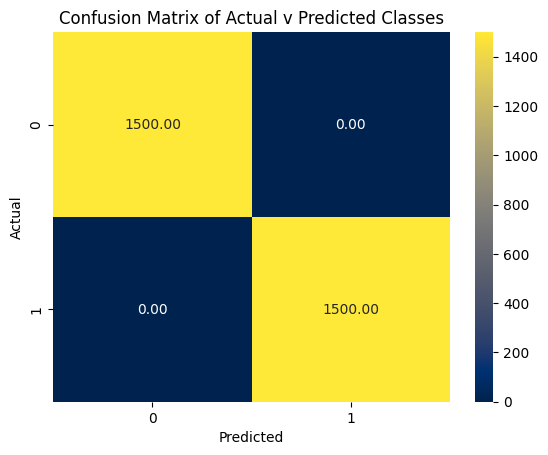

In [44]:
sns.heatmap(conf_m, annot=True, fmt = ".2f", cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Actual v Predicted Classes")
plt.show()

In [65]:
def cbam_classifier(Country_of_Origin,Transport_Mode,Customs_Regime, Sector, hs_code, Co2_tonnes):
                    hs_code = str(hs_code)
                    hs_code_point = hs_code.find(".")
                    hscode_general = hs_code[:hs_code_point]
                    cost = round(73.21 * Co2_tonnes,2)

                    x = pd.DataFrame(
                            {
                                    "Country_of_Origin": [Country_of_Origin],
                                    "Transport_Mode" : [Transport_Mode],
                                    "Customs_Regime" : [Customs_Regime],
                                    "Sector" : [Sector],
                                    "hscode_general": [hscode_general]
                            }
                    )
                    
                    with open("encoders.pkl", "rb") as f:
                            encoders = pickle.load(f)
                    for col in x.columns:
                            if col in encoders:
                                    x[col] = encoders[col].transform(x[col])

                    y_hat_prob = model.predict(x)
                                        
                                        

                    y_hat = (y_hat_prob[0] >= 0.5)

                    if y_hat[0] == 1:
                        return f"Import is Subject to CBAM regulations CBAM import with {Co2_tonnes} tonnes is subject to a levy of EUR {cost}"
                        
                    else:
                        return "Import not subject to CBAM regulations"
                        

5001	3901.10	Chemicals product (3901.10)	Egypt	1004.34	550426.59	6.09	Sea	Free circulation	Chemicals	No

In [66]:
cbam_classifier("Egypt", "Sea", "Free circulation", "Chemicals", 3901.10, 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


'Import not subject to CBAM regulations'

1	Fertiliser product (3102.60)	Turkey	755.33	580066.47	23.13	Sea	Transit	Fertiliser	Yes	3102

In [67]:
cbam_classifier("Turkey","Sea", "Transit","Fertiliser",3102.60, 23.13)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


'Import is Subject to CBAM regulations CBAM import with 23.13 tonnes is subject to a levy of EUR 1693.35'

### Conclusion
##### This notebook analysed import data and answered some fundamental statistical questions about the imports. It then built a Neural Network model to predict if an import is subject to CBAM levies using selected features: Country of Origin, Transport Mode, Customs Regime and HS Code. I built a function that uses the model to make such a prediction, and if the import is a CBAM subject, the function calculates the levy using a set of made-up assumptions